# **Analyse des données et visualisation**

## **0. Imports** 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
COLOR="#3ade86"

## **1. Charger les données**

In [28]:
data=pd.read_csv("Housing.csv")
data.head()

,unnamed,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,13300000.0,7420,4.0,2.0,3,yes,no,no,no,yes,2,yes,furnished
1,1,12250000.0,8960,4.0,4.0,4,yes,no,no,no,yes,3,no,NaN
2,2,12250000.0,9960,3.0,2.0,2,yes,no,yes,no,no,2,yes,semi-furnished
3,3,12215000.0,7500,4.0,2.0,2,yes,no,yes,no,yes,3,yes,FUrnished
4,4,11410000.0,7420,4.0,1.0,2,yes,yes,yes,no,yes,2,no,furnished


## **2. Analyse des données**

In [29]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unnamed           548 non-null    int64  
 1   price             547 non-null    float64
 2   area              548 non-null    int64  
 3   bedrooms          545 non-null    float64
 4   bathrooms         545 non-null    float64
 5   stories           548 non-null    int64  
 6   mainroad          546 non-null    object 
 7   guestroom         548 non-null    object 
 8   basement          548 non-null    object 
 9   hotwaterheating   548 non-null    object 
 10  airconditioning   548 non-null    object 
 11  parking           548 non-null    int64  
 12  prefarea          548 non-null    object 
 13  furnishingstatus  545 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 60.1+ KB


In [30]:
data.describe()

,unnamed,price,area,bedrooms,bathrooms,stories,parking
count,548.000000,5.470000e+02,548.000000,545.000000,545.000000,548.000000,548.000000
mean,273.503650,4.774133e+06,5160.445255,2.965138,1.284404,1.806569,0.693431
std,158.344561,1.879724e+06,2192.836506,0.738064,0.501684,0.867340,0.862054
min,0.000000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,136.750000,3.447500e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,4.340000e+06,4580.000000,3.000000,1.000000,2.000000,0.000000
75%,410.250000,5.757500e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,548.000000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [31]:
pd.DataFrame(np.array(data)[:,1:]).mode()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4200000.0,6000,3.0,1.0,2,yes,no,no,no,no,0,no,semi-furnished


## **3. Visualisation des données**

In [32]:
# Pour un meilleur affichage des graphes
Nom_Attr={key:value for key,value in zip(range(data.shape[1]),data.keys())}
Nom_Attr

{0: 'unnamed',
 1: 'price',
 2: 'area',
 3: 'bedrooms',
 4: 'bathrooms',
 5: 'stories',
 6: 'mainroad',
 7: 'guestroom',
 8: 'basement',
 9: 'hotwaterheating',
 10: 'airconditioning',
 11: 'parking',
 12: 'prefarea',
 13: 'furnishingstatus'}

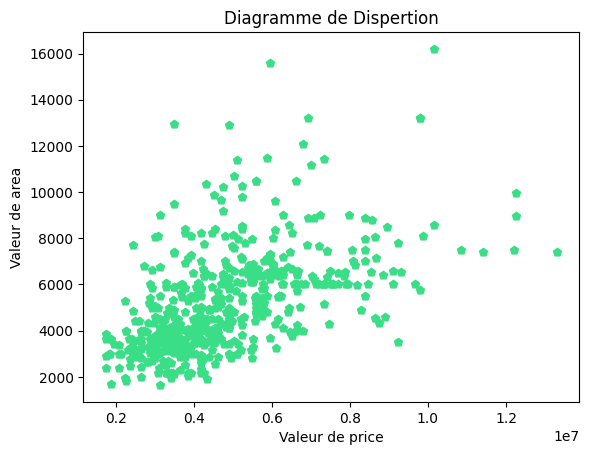

In [33]:

def scatterplot(attribut,attribut2):
    dataset=np.array(data)
    plt.scatter(dataset[:,attribut],dataset[:,attribut2],marker ='p',color=COLOR)
    plt.title('Diagramme de Dispertion')
    plt.xlabel("Valeur de "+Nom_Attr[attribut])
    plt.ylabel("Valeur de "+Nom_Attr[attribut2])
    plt.show()

scatterplot(1,2)

c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\numpy\lib\_histograms_impl.py:835: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\numpy\lib\_histograms_impl.py:836: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


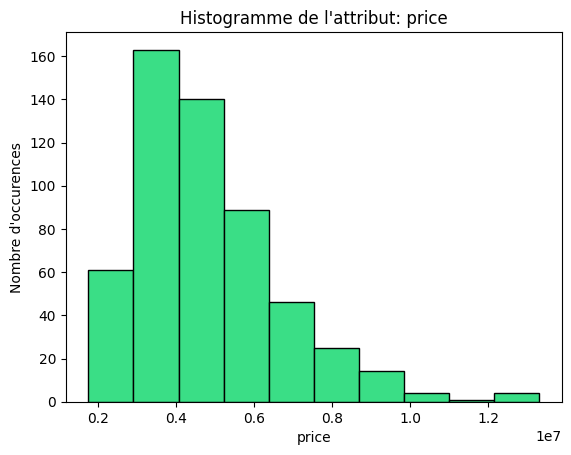

In [34]:
def Histogramme(attribut):
    dataset=np.array(data)
    plt.hist(dataset[:,attribut],edgecolor='black',color=COLOR)
    plt.title("Histogramme de l'attribut: "+Nom_Attr[attribut])
    plt.ylabel("Nombre d\'occurences")
    plt.xlabel(Nom_Attr[attribut])
    plt.show()
Histogramme(1)

c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\matplotlib\cbook.py:1320: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\matplotlib\cbook.py:1327: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\matplotlib\cbook.py:1335: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\Users\mayah\Desktop\Ateliers\New_LABS\env\Lib\site-packages\matplotlib\cbook.py:1336: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


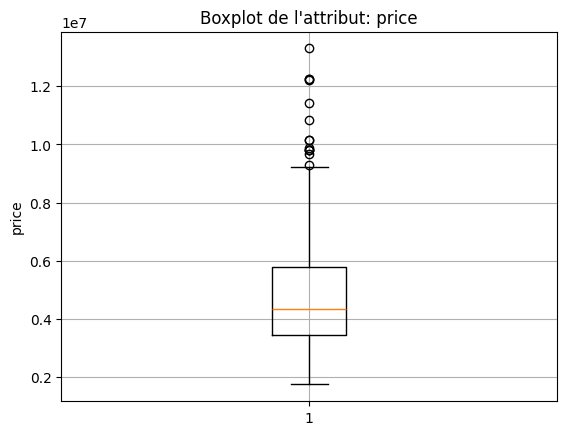

In [35]:
num_attr=[i for i in range(data.shape[1]) if  pd.api.types.is_numeric_dtype(data.iloc[:, i]) ]
def Boite_a_moustache(attribut):
    dataset=np.array(data)
    if attribut not in num_attr:
        print("Entrez le numero d'une colonne numerique")
    else:
        plt.boxplot(dataset[:,attribut])
        plt.title("Boxplot de l'attribut: "+Nom_Attr[attribut])
        plt.ylabel(Nom_Attr[attribut])
        plt.grid(True)
        plt.show()

Boite_a_moustache(1)